In [ ]:
""" We will need to download some images to analyze. I have chosen a random 
    image from the Sloan Digital Sky Survey (SDSS). We can find it:
    https://www.sdss3.org/dr9/tutorials/retrieveFITS.php
    
    You'll eventually get the following URLs. If you want to retrieve them
    yourself, follow the steps below. If you just want to copy/paste, then
    skip on down to the bottom...
    
   > Click on the link in the first bullet point "the SAS bulk fields search"
   > This will bring you to a window with several lists of coordinates. 
   > Click "submit" on any other the three fields (I did middle, but they are
     all equivalent). 
   > Now, scroll down the page until you see a list of stuff that says, 
   > "Run, Camcol, Field, RA, DEC, ..."
   > Let's check just the FIRST row (run=4570, camcol=4, field=135, ...)
   > Once that is checked, click the blue "Download FITS" button above, on the
     right side of the screen.
     
     
    Once we have the URLs:
    http://data.sdss3.org/sas/dr12/boss/photoObj/frames/301/4570/4/frame-g-004570-4-0135.fits.bz2
    http://data.sdss3.org/sas/dr12/boss/photoObj/frames/301/4570/4/frame-r-004570-4-0135.fits.bz2
    
    We want to save these URLs into a .txt document, called "download.txt"
    Then, open up your terminal, and run the following command:
    wget -i download.txt
    
    This will download all the images. I've pared the list down to just two (out of five).
    Now, we need to unzip them. Run the commands:
    unzip frame-g-004570-4-0135.fits.bz2
    unzip frame-r-004570-4-0135.fits.bz2
    
    If that doesn't work, them maybe "bunzip" instead of "unzip"
"""

In [4]:
""" For this example to work, we need to acquire the pyfits module. 
Type the following command into the terminal:
pip install pyfits

This will install pyfits! Astropy comes standard with Anaconda, but it is
not supported on Windows. I know that pyfits is supported on Windows, Mac,
and Linux/Unix, so it is a safe choice for our purposes.
"""
import numpy as np
import pyfits
import matplotlib.pyplot as plt
%matplotlib inline

im_g = pyfits.open('frame-g-004570-4-0135.fits')

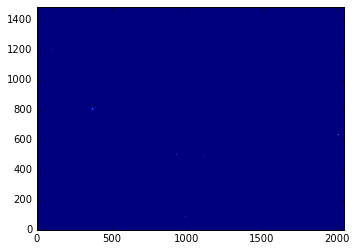

In [5]:
# Plot!!!! Using matplotlib.
plt.imshow(im_g[0].data,origin='lower')

In [6]:
# Oh, that didn't come out like we expected ... 
# Let's see ....
print("max = ",im_g[0].data.max(),"min = ",im_g[0].data.min(), "std = ",im_g[0].data.std())

max =  168.25 min =  -0.0786133 std =  0.395886


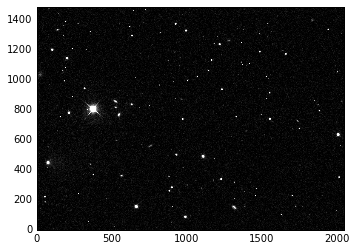

In [10]:
# Oh! There is one star that is a zillion times brighter than the other objects. So ...
plt.imshow(im_g[0].data,origin='lower',vmin=0,vmax=0.25,cmap=plt.cm.gray)

In [1]:
# This command will look at the meta-data: all the stuff you need to know about the image
# in order to properly orient it on the sky.
# im_g[0].header 

In [12]:
# The following will properly grab relevant information from the header and create lists of
# the right ascention and declination ranges of the images (the horizontal and vertical axes,
#    respectively).
ra = im_g[0].header['CD1_1']*(np.arange(im_g[0].header['NAXIS1']) - (im_g[0].header['CRPIX1']-1)) + im_g[0].header['CRVAL1']
de = im_g[0].header['CD2_2']*(np.arange(im_g[0].header['NAXIS2']) - (im_g[0].header['CRPIX2']-1)) + im_g[0].header['CRVAL2']

([<matplotlib.axis.YTick at 0x63a1ae9f98>,
 <a list of 4 Text yticklabel objects>)

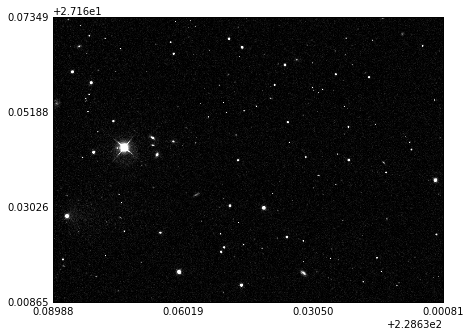

In [23]:
# OK, so plot AND change the axis labels to reflect the RA/DEC coordinates. Then show only
# four tick marks, because this is kind of a small figure...
plt.figure(figsize=(7,7))
plt.imshow(im_g[0].data,origin='lower',vmin=0,vmax=0.25,cmap=plt.cm.gray,extent=[ra.max(),ra.min(),de.min(),de.max()])
plt.xticks(np.linspace(ra.max(),ra.min(),4))
plt.yticks(np.linspace(de.min(),de.max(),4))

In [22]:
ra.min() (750,600)

228.6308076074265

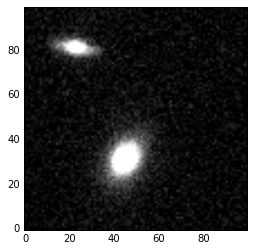

In [32]:
# Let's just zoom in on a few places. Can you locate this region on the bigger image
# shown above? 
plt.imshow(im_g[0].data[735:835,500:600],vmin=0,vmax=0.25,cmap=plt.cm.gray,origin='lower')

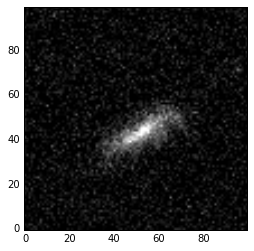

In [36]:
plt.imshow(im_g[0].data[515:615,700:800],vmin=0,vmax=0.15,cmap=plt.cm.gray,origin='lower')

In [ ]:
# There are some intricacies to note. The right ascention and declination coordinates
# properly label the image. Python stores an image as 2-D matrix of numbers, refered 
# here as:
# im_g[0].data
# Note,though, that a SINGLE pixel is called via:
# im_g[0].data[x,y].
# This calls the (x,y) coordinate of the image. It says the "xth" ROW and the "yth" 
# COLUMN. Recal that our sky coordinates are (RA,DEC) = (horizontal axis, vertical axis)
# So the declination is the ROWS and RA is the COLUMNS. Therefore, python REVERSES the
# normal order of coordinates...
# im_g[0].data[ declination, right ascention ]
# This is something to keep in mind, and there are some ways of dealing with it.